<a href="https://colab.research.google.com/github/anarekuli011/Euroavia/blob/main/Euroavia_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise setup and information

In [1]:
"""                               PLEASE READ THESE POINTS BEFORE YOU START WITH THE EXERCISE                                         """


"""1. Check if you have all the files from the repository cloned correctly into Google Colab. If any files are missing retry the cloning, or add them manually."""

"""2. The sections are marked with 'Enter your code here'. But you still need to go through each section to understand the task."""

"""3. You have to press run on each cell as you go through the notebook. You can do this by pressing the play button in the left corner of each cell or ctr+shift+enter."""

"""4. Be sure to read all the comments in each cell. """

"""5. If you have any questions, or problems feel free to reach out! This isn't an exam 😁. """

"""                                                    GOOD LUCK!                                                                     """

"""                               PLEASE READ THESE POINTS BEFORE YOU START WITH THE EXERCISE                                         """

'                               PLEASE READ THESE POINTS BEFORE YOU START WITH THE EXERCISE                                         '

In [2]:
""" In this exercise we will take you through a project that is currently ongoing at ADB Safegate """

""" You will experience with real examples, what it's like to be a part of Airside 4.0 that is currently transforming airfield ecosystem to join the Digital and Information Age. """

""" Lets start by running this code below to first see how the Airside industry has developed alongside the development and growth of technology. """

!git clone https://github.com/anarekuli011/Euroavia_Files.git

Cloning into 'Euroavia_Files'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 63 (delta 25), reused 43 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 5.94 MiB | 23.31 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [3]:
"""

    Run this cell to import all the libraries you will need to complete the exercise.
    You can import other libraries if you would like to solve this exercise with a different method.

"""

import sys
sys.path.append('/content/Euroavia_Files')
import os
os.chdir('/content/Euroavia_Files')


import Functions as fn

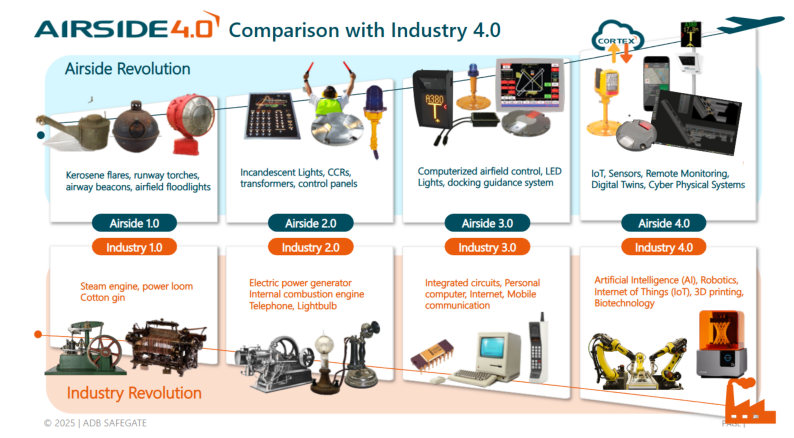

In [4]:
"""

    Run this cell to get a quick look at how the technology in the airfield industry has progressed along side the advancements in technology.

    Here is the timeline in which those technologies have been developed:
    Airside 1.0 (1910) --> Airside 2.0 (1920) --> Airside 3.0 (1969) --> Airside 4.0 (2022)

    So the recent development in Airside 4.0 is a new game changing development, the biggest change to the industry since 1969.

"""
fn.show_img('Images/AIRSIDE 4.0 Story.png', 10, 6)

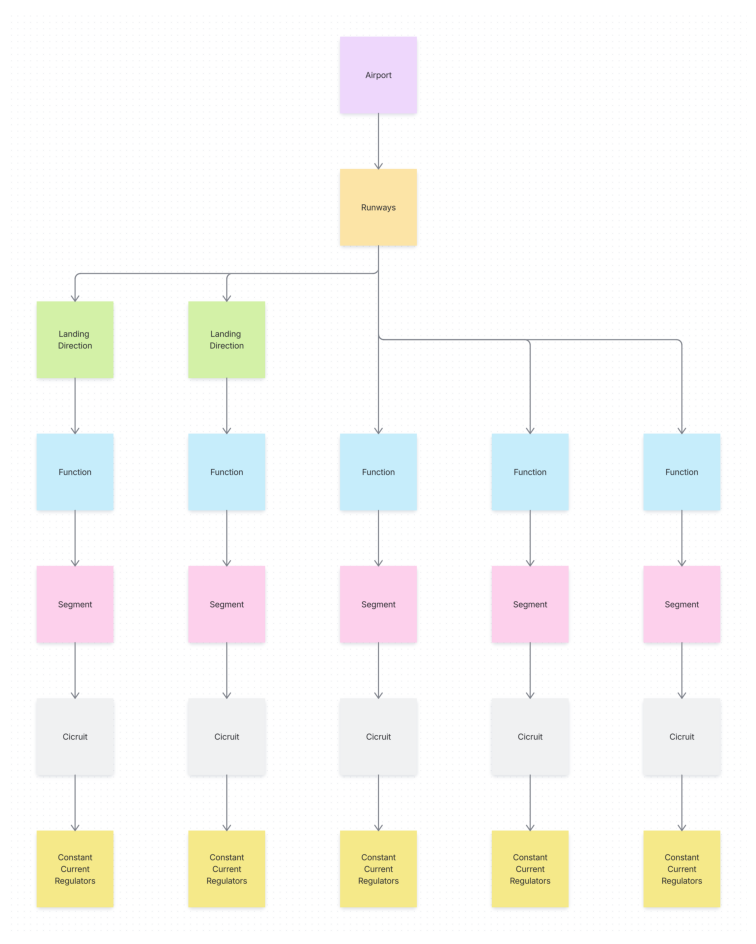

In [5]:
"""

    Here you will get an idea of how ALCMS (Airfield Lighting Control and Monitoring Systems) are set up.

    You can see the architecture below highlights how the system goes from a high-level view "Airport Name" all the way down to each regulator.

"""

fn.show_img('Images/ALCMS Architecture.png')

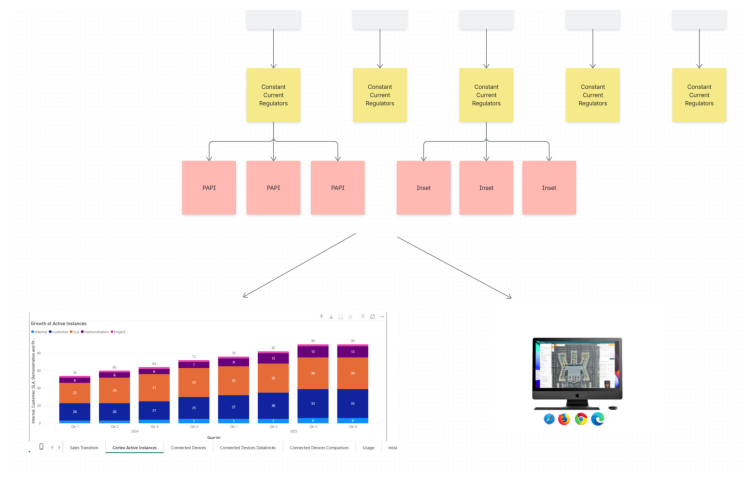

In [6]:
"""

    The goal of the current project (from which this exercise is taken) is to explore how this architecture can be mapped to a table format and stored on Azure Databricks.
    But also mapped to individual assets and lights, and their specific locations (in coordinates), as this data already exists in Databricks.

    Doing this has several benefits mainly - information transparency, both internal and external.
    As we can use this stored data to create:

    1. High-level views that beneficial for managers to see KPIs and identify focus points in development and operations.
    2. In-depth dashboard at Region level for internal use to analyze growth and operations.
    3. In-depth dashboards at Airport level for clients to more access to their ALCMS system's information.
    4. Proof of concepts for developing these views in CORTEX Service, our Airfield Lighting preventive maintenance and monitoring software.

"""


fn.show_img('Images/Connection to CXS.png', 10, 6)


# Exercise 1




In [7]:
"""
    For excercise 1, lets start with looking at how the first goal of this project was tackled:

    We want to to map the ALCMS architecture into a table format and store it on Azure Databricks.
    For the scope of this excercise we will be putting the transformed data into an excel sheet.

"""

' \n    For excercise 1, lets start with looking at how the first goal of this project was tackled:\n    \n    We want to to map the ALCMS architecture into a table format and store it on Azure Databricks.\n    For the scope of this excercise we will be putting the transformed data into an excel sheet. \n\n'

In [8]:
"""
    Imports
"""

import xml.etree.ElementTree as ET
import pandas as pd

In [13]:
"""
    Now lets take a look at the XML file for Queenstown Airport, break down all the information one cell at a time.
"""
#XML File
xml_path = "NZQN - NewZealand - Queenstown.xml"

tree = ET.parse(xml_path)
root = tree.getroot()


"""
    Now lets take a look at the XML file for Queenstown Airport, break down all the information one cell at a time.
"""

print("Root tag:", root.tag)
print("Root attributes:", root.attrib)
print("Number of direct children of root:", len(list(root)))




Root tag: Project
Root attributes: {'Name': 'Queenstown', 'ALCMSServersPCStationIDs': '31,32', 'ALCMSClientsPCStationIDs': '1-23', 'ALCMSHostsPCStationIDs': '41-50', 'NCUsPCStationIDs': '101-110', 'LastEditTime': '2026-02-02 13:19:28', 'STASafeControlStationName': 'STA_1', 'AirportLogo': '', 'ConfigFileNamePath': 'C:\\Users\\mdenon\\DevOps Customer Repos\\NZNQ-NewZealand-Queenstown-Configuration\\ALCMSConfiguration.8.71\\NZQN - NewZealand - Queenstown.alcms'}
Number of direct children of root: 9


In [14]:
"""
    Here you can see all the Direct child tags under the root.
    This is mainly to give an overview of what
"""

print("\nDirect child tags under root (unique):")
print(sorted({child.tag for child in root}))

print("\nDirect children (tag, attrib):")
for child in list(root)[:len(list(root))]:
    print(" -", child.tag, child.attrib)


Direct child tags under root (unique):
['ALCMSBridge', 'ALCMSGUIs', 'ALCMSHosts', 'ALCMSServer', 'ALCMSVisualTemplateCollection', 'ConfigFingerPrint', 'ConfigToolVersion', 'MQServerConfig', 'PCStations']

Direct children (tag, attrib):
 - ConfigToolVersion {'Major': '8', 'Minor': '72', 'Build': '0', 'Revision': '0'}
 - PCStations {}
 - ALCMSVisualTemplateCollection {}
 - ALCMSGUIs {}
 - ALCMSServer {'ID': '0', 'Name': 'ALCMSServer', 'Name2': '', 'Location': '', 'Location2': '', 'IP1': '127.0.0.1', 'IP2': '', 'PCStationA': '32', 'PCStationB': '31', 'IsDefaultMaster': 'true', 'InSim': 'false', 'STA_IsInSim': 'true'}
 - ALCMSHosts {}
 - MQServerConfig {}
 - ALCMSBridge {}
 - ConfigFingerPrint {'PCStations': '10995', 'ALCMSGUIs': '48468', 'ALCMSBridge': '5294', 'ALCMSServer': '18640', 'ALCMSHosts': '2154', 'AGLAS2': '0', 'ASP': '0', 'DLILCMS': '0', 'MQServerConfig': '64530', 'SafeControl': '0', 'WinCCOPCConfig': '0'}


# Exercise 2 (Optional)